### 1. 라이브러리 호출

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 2. 데이터 불러오기

In [30]:
# 건물정보 데이터셋
building = pd.read_csv('data/building_info.csv')

# 날씨/전력사용량 데이터셋 (건물/시간대별)
train = pd.read_csv('data/train.csv')

# 날씨/전력사용량 데이터셋 (건물/시간대별)
test = pd.read_csv('data/test.csv')

### 3. 기본 데이터셋 확인

In [3]:
# 빌딩 정보 데이터
building.head(5)

,건물번호,건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
0,1,건물기타,110634.00,39570.00,-,-,-
1,2,건물기타,122233.47,99000.00,-,-,-
2,3,건물기타,171243.00,113950.00,40,-,-
3,4,건물기타,74312.98,34419.62,60,-,-
4,5,건물기타,205884.00,150000.00,-,2557,1000


In [4]:
# 날씨/전력사용량 데이터셋 
train.head(5)

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
0,1_20220601 00,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28
1,1_20220601 01,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36
2,1_20220601 02,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88
3,1_20220601 03,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76
4,1_20220601 04,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40


In [5]:
test.head(5)

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%)
0,1_20220825 00,1,20220825 00,23.5,0.0,2.2,72
1,1_20220825 01,1,20220825 01,23.0,0.0,0.9,72
2,1_20220825 02,1,20220825 02,22.7,0.0,1.5,75
3,1_20220825 03,1,20220825 03,22.1,0.0,1.3,78
4,1_20220825 04,1,20220825 04,21.8,0.0,1.0,77


### 4. 결측치 확인 - 빌딩 정보 데이터

In [21]:
# 빌딩 정보 데이터에는 결측치가 없음을 확인할 수 있다.
# 하지만 NAN으로 결측치가 표시되어 있기 때문에 다른 방식으로 결측치를 확인해야 함
building = building.replace('-', np.nan)

,건물번호,건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
0,1,건물기타,110634.00,39570.00,NaN,NaN,NaN
1,2,건물기타,122233.47,99000.00,NaN,NaN,NaN
2,3,건물기타,171243.00,113950.00,40,NaN,NaN
3,4,건물기타,74312.98,34419.62,60,NaN,NaN
4,5,건물기타,205884.00,150000.00,NaN,2557,1000
...,...,...,...,...,...,...,...
95,96,호텔및리조트,93314.00,60500.00,NaN,NaN,NaN
96,97,호텔및리조트,55144.67,25880.00,NaN,NaN,NaN
97,98,호텔및리조트,53578.62,17373.75,NaN,NaN,NaN
98,99,호텔및리조트,53499.00,40636.00,NaN,NaN,NaN


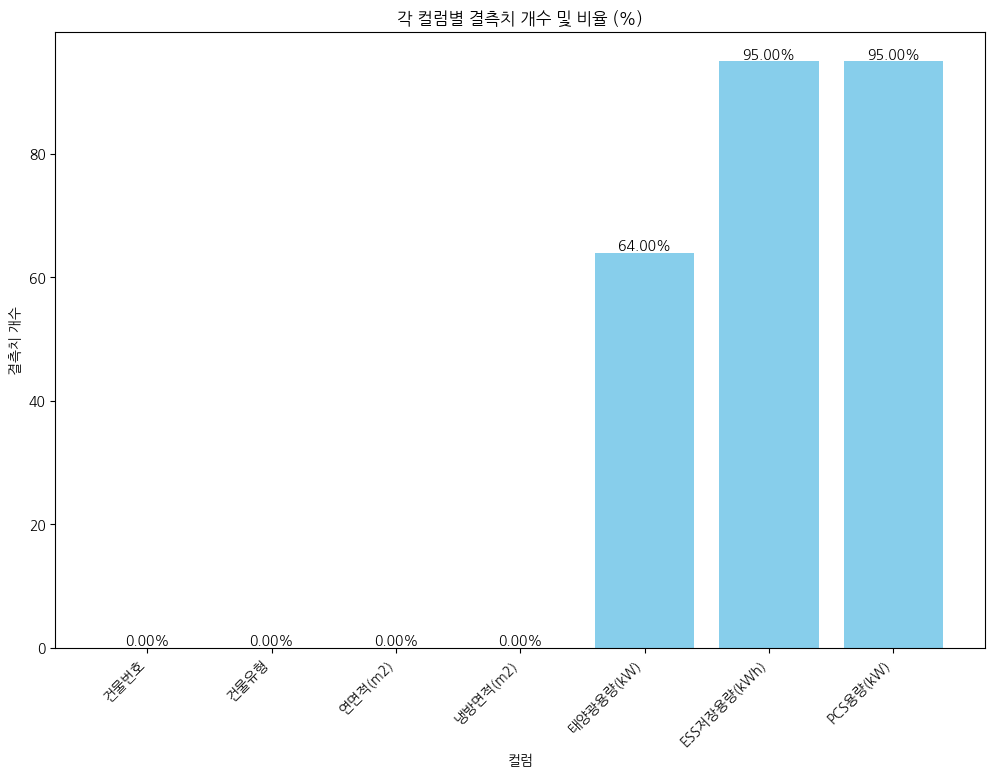

In [28]:
# 결측치 비율에 관한 시각화

# 'NanumGothic' 폰트를 사용합니다.
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 문제 해결

# 그래프 생성
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(missing_values.index, missing_values.values, color='skyblue')

# 각 막대에 대한 결측치 비율 표시
for bar, percentage in zip(bars, missing_percentage.values):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{percentage:.2f}%', va='bottom', ha='center', color='black')

# 축 레이블 및 타이틀 설정
ax.set_xlabel('컬럼')
ax.set_ylabel('결측치 개수')
ax.set_title('각 컬럼별 결측치 개수 및 비율 (%)')
plt.xticks(rotation=45, ha='right')

# 그래프 표시
plt.show()


In [36]:
# 냉방면적이 0인 행 출력
building[building['냉방면적(m2)'] == 0]

,건물번호,건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
64,65,아파트,183839.000,0.0,-,-,-
65,66,아파트,105073.000,0.0,-,-,-
67,68,아파트,389395.928,0.0,-,-,-
